![header%20ipynb.png](attachment:header%20ipynb.png)

<div class="alert alert-block alert-danger">
<b>Package version :</b>
    <ol>
    <li>Tensorflow 2.4.1</li>
    <li>Keras 2.4.3</li>
    <li>Matplotlib 3.5.0</li>
    <li>Scikit-learn 0.23.2</li>
    </ol>
</div>

In [1]:
## Just disables the warning, doesn't take advantage of AVX/FMA to run faster
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (114, 4)
X_val (21, 4)
X_test (15, 4)


In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [5]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9523809523809523


In [6]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 1.0


Akurasi Testing ANN: 1.0


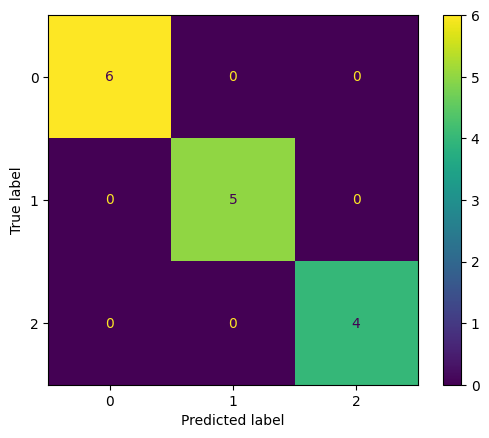

In [7]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

prediksi = mlp.predict(X_test)
cm = confusion_matrix(Y_test, prediksi)
ConfusionMatrixDisplay(cm).plot()
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)


In [8]:
# from keras.utils import to_categorical

from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [10]:
model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_data=(X_val,Y_val))

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 1.2597 - acc: 0.3596 - val_loss: 1.1929 - val_acc: 0.2381
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0363 - acc: 0.3772 - val_loss: 1.0180 - val_acc: 0.3810
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9378 - acc: 0.4035 - val_loss: 0.9554 - val_acc: 0.2857
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8550 - acc: 0.4825 - val_loss: 0.9013 - val_acc: 0.4762
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7855 - acc: 0.6930 - val_loss: 0.8272 - val_acc: 0.6667
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7342 - acc: 0.7982 - val_loss: 0.7784 - val_acc: 0.7143
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6868 - acc: 0.6842 - val_loss: 0.7617 - val_acc: 0.5714
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6426 - 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)


1/1 [==============================] - 0s 29ms/step - loss: 0.1448 - acc: 0.9333
Akurasi Testing ANN: 0.9333333373069763
